<a href="https://colab.research.google.com/github/V-01fe21bec107/Machine-Learning/blob/main/STFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D

# Function to load audio dataset
def load_audio_dataset(data_dir):
    labels = []
    files = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        for filename in os.listdir(label_dir):
            if filename.endswith(".wav"):
                audio_path = os.path.join(label_dir, filename)
                files.append(audio_path)
                labels.append(label)
    return files, labels

# Function to extract MFCC features from audio files using STFT
def extract_mfcc_stft(file_path, num_mfcc=13, n_fft=2048, hop_length=512, pad_length=4000):
    samples, sample_rate = librosa.load(file_path, sr=None)
    stft = librosa.core.stft(samples, n_fft=n_fft, hop_length=hop_length)

    # Convert STFT to MFCC
    mfccs = librosa.feature.mfcc(S=librosa.amplitude_to_db(stft), n_mfcc=num_mfcc)

    # Pad or truncate the features to a fixed length
    if mfccs.shape[1] < pad_length:
        pad_width = pad_length - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)))
    else:
        mfccs = mfccs[:, :pad_length]

    # Add a channel dimension to match Conv1D input shape
    mfccs = np.expand_dims(mfccs, axis=-1)
    return mfccs

# Specify the path to your audio dataset
audio_dataset_path = '/content/drive/MyDrive/libri/2952'

# Load the audio dataset
files, labels = load_audio_dataset(audio_dataset_path)

# Lists to store features and labels
all_features = []
all_labels = []

# Extract MFCC features using STFT for each audio file
for file_path, label in zip(files, labels):
    mfccs = extract_mfcc_stft(file_path)
    all_features.append(mfccs)
    all_labels.append(label)

# Convert lists to numpy arrays
X = np.array(all_features)
le = LabelEncoder()
y = le.fit_transform(all_labels)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=len(set(all_labels)))

# Split the dataset into training and testing sets
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Print the number of samples in each set
print(f'Total samples: {len(files)}')
print(f'Training samples: {len(X_train)}')
print(f'Testing samples: {len(X_test)}')

# Assuming X is your input data with shape (None, 13, 4000, 1)
#X_reshaped = np.reshape(X, (X.shape[0], 20, 4000))

#model = Sequential()
#model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(20, 4000)))

# Build the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(set(all_labels)), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)
# Create the directory if it doesn't exist
# os#.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Save the trained model
# model.save(model_save_path)
# Save the trained model
#model.save('/content/drive/MyDrive/ml cp/fb')

<ipython-input-18-8cfdc293c3ae>:29: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  mfccs = librosa.feature.mfcc(S=librosa.amplitude_to_db(stft), n_mfcc=num_mfcc)


Total samples: 119
Training samples: 95
Testing samples: 24
Epoch 1/20
3/3 [==============================] - 1s 137ms/step - loss: 186.3197 - accuracy: 0.2947 - val_loss: 106.1604 - val_accuracy: 0.4167
Epoch 2/20
3/3 [==============================] - 0s 52ms/step - loss: 59.6506 - accuracy: 0.5579 - val_loss: 55.6419 - val_accuracy: 0.4167
Epoch 3/20
3/3 [==============================] - 0s 48ms/step - loss: 15.3095 - accuracy: 0.7368 - val_loss: 55.1153 - val_accuracy: 0.7083
Epoch 4/20
3/3 [==============================] - 0s 55ms/step - loss: 8.1281 - accuracy: 0.8632 - val_loss: 34.5248 - val_accuracy: 0.7083
Epoch 5/20
3/3 [==============================] - 0s 55ms/step - loss: 2.6285 - accuracy: 0.9368 - val_loss: 19.2898 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 0s 51ms/step - loss: 0.2547 - accuracy: 0.9789 - val_loss: 57.3823 - val_accuracy: 0.5833
Epoch 7/20
3/3 [==============================] - 0s 53ms/step - loss: 1.4836 - accuracy: 0.91

In [19]:
# Print the training accuracy
training_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {training_accuracy * 100:.2f}%')

Training Accuracy: 100.00%


In [20]:
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=['accuracy'])

# Learning rate scheduler
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 20:
        lr *= 0.5
    elif epoch > 10:
        lr *= 0.1
    return lr
"""
# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=60,
    callbacks=[LearningRateScheduler(lr_schedule)]
)
"""

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')


# Print the number of samples in each set
print(f'Total samples: {len(files)}')
print(f'Training samples: {len(X_train)}')
print(f'Testing samples: {len(X_test)}')

Test loss: 43.60884475708008
Test accuracy: 0.7083333134651184
Validation Loss: 43.6088
Validation Accuracy: 0.7083
Total samples: 119
Training samples: 95
Testing samples: 24


In [21]:
# Save the trained model
model.save('/content/drive/MyDrive/ML/Stutter_speech.keras')

# Predict the probabilities for the test set
y_pred_probs = model.predict(X_test)

# Set a threshold for classification (adjust as needed)
threshold = 0.5
y_pred_classes = (y_pred_probs[:, 1] > threshold).astype(int)

# Convert one-hot encoded labels back to original labels
y_test_classes = np.argmax(y_test, axis=1)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
classification_rep = classification_report(y_test_classes, y_pred_classes)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

model.summary()

1/1 [==============================] - 0s 74ms/step
Accuracy: 0.4166666666666667
Confusion Matrix:
[[ 2  4  0]
 [ 0  8  0]
 [10  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.33      0.22         6
           1       0.67      1.00      0.80         8
           2       0.00      0.00      0.00        10

    accuracy                           0.42        24
   macro avg       0.28      0.44      0.34        24
weighted avg       0.26      0.42      0.32        24

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 11, 32)            384032    
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 5, 32)             0         
 g1D)                                                            
                                          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


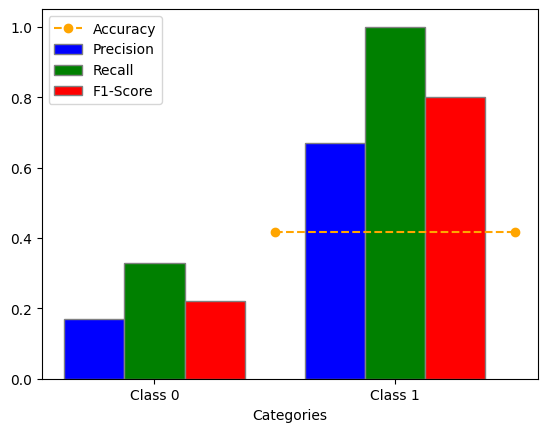

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
categories = ['Class 0', 'Class 1']
precision = [0.17, 0.67]
recall = [0.33,1.00]
f1_score = [0.22, 0.80]

# Ensure that all arrays have the same length
max_length = max(len(precision), len(recall), len(f1_score))
precision += [np.nan] * (max_length - len(precision))
recall += [np.nan] * (max_length - len(recall))
f1_score += [np.nan] * (max_length - len(f1_score))

# Bar plots
bar_width = 0.25
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
# Line plot for accuracy
plt.plot(r4, [accuracy] * len(categories), color='orange', linestyle='--', marker='o', label='Accuracy')

plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-Score')

plt.xlabel('Categories')
plt.xticks([r + bar_width for r in range(len(categories))], categories)
plt.legend()
plt.show()

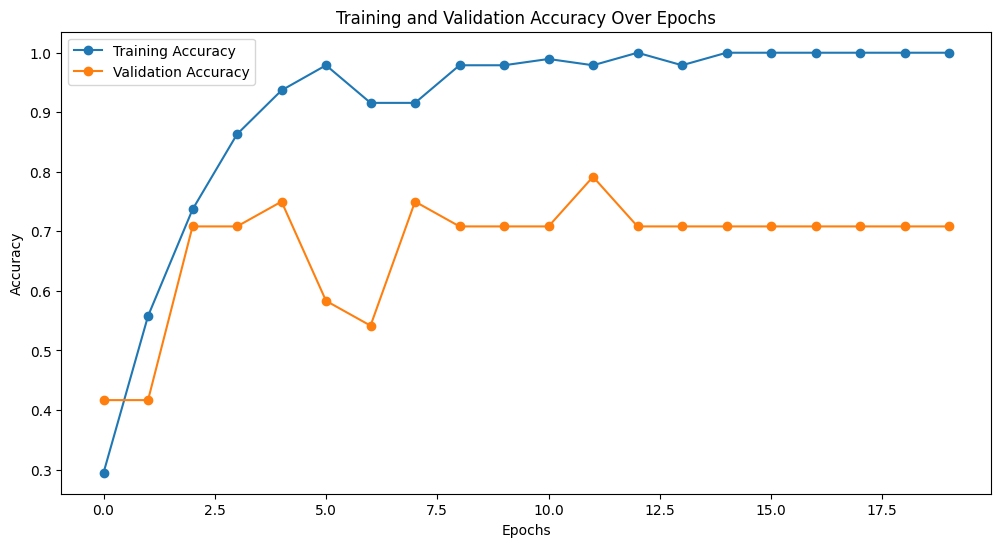

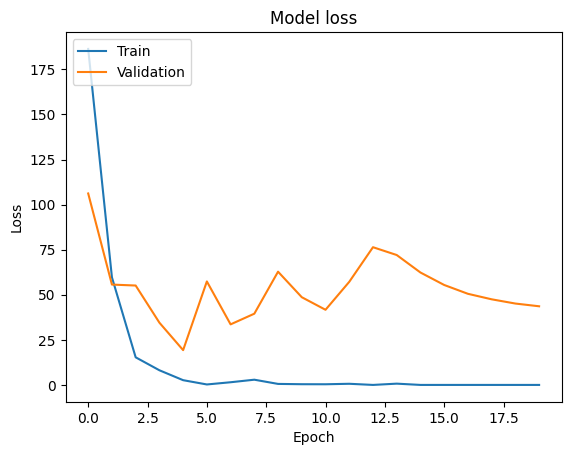

In [23]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')

# Title and labels
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Legend
plt.legend()
# Show plot
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
import os
import librosa
import numpy as np
from keras.models import load_model

# Function to extract MFCC features from audio samples
def extract_mfcc(samples, num_mfcc=13, pad_length=4000):
    mfccs = librosa.feature.mfcc(y=samples, n_mfcc=num_mfcc)

    # Pad or truncate the features to a fixed length
    if mfccs.shape[1] < pad_length:
        pad_width = pad_length - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)))
    else:
        mfccs = mfccs[:, :pad_length]

    # Add a channel dimension to match Conv1D input shape
    mfccs = np.expand_dims(mfccs, axis=-1)
    return mfccs

# Load the trained CNN model
model = load_model('/content/drive/MyDrive/ML/Stutter_speech.keras')


# Function to classify speech as stuttered or not
def classify_speech(audio_file_path, threshold=0.5):
    # Load the new audio file
    samples, sample_rate = librosa.load(audio_file_path, sr=None)

    # Extract MFCC features
    mfccs = extract_mfcc(samples)

    # Add a batch dimension
    mfccs = np.expand_dims(mfccs, axis=0)

    # Predict the probabilities
    predicted_probabilities = model.predict(mfccs)

    # Check if the predicted probability for "stuttered" is above the threshold
    is_stuttered = predicted_probabilities[0, 1] > threshold

    return is_stuttered

# Example usage
audio_file_path = '/content/drive/MyDrive/libri/2952/408/2952-408-0028.wav'
is_stuttered = classify_speech(audio_file_path)

if is_stuttered:
    print("Stutter detected")
else:
    print("Non-stuttered speech")

1/1 [==============================] - 0s 91ms/step
Non-stuttered speech
